# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


**Цель исследования** — ответить на следующие вопросы:
1. Найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
2. Научиться определять рыночную стоимость объектов недвижимости.

**Ход исследования**

Общую информацию мы получим из файла `real_estate_data.csv`. Чтобы понять качество данных, мы сделаем первичный обзор данных.

Мы проверим данные на явные ошибки. На этапе предобработки данных выявим, встречаются ли пропущенные значения, аномалии, неверные типы данных или дубликаты в столбцах датафрейма.

На этапе исследовательского анализа данных, мы изучим параметры объектов, построим отдельные графики по каждому параметру. Так же выясним какие факторы больше всего влияют на полную стоимость объекта.

Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Выводы по проведенном анализу.


### Обзор данных

In [1]:
import pandas as pd # импортируем нужные библиотеки
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
# поставим разделитель, чтобы данные о датасете отобразились корректно

Посмотрим общую информацию о датафрейме:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим, что присутствуют пропуски. Не везде это критично, так как, например, это может означать, что балкона просто нет, что в 3 км нет водоема или парка и тому подобное. В конце концов, расстояния до парков и водоемов могли просто не заполнять, так как это не первостепенная информация. Более точно разберем это в **Предобработке данных**.


Напишем разъяснения, что обозначает каждый столбец:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [4]:
pd.options.display.max_columns = 30 
# выведем таблицу так, чтобы были видны все столбцы, благодаря данной опции

In [5]:
df.head(20) # посмотрим первые 20 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
pd.options.display.float_format = '{:,.2f}'.format
# приведем формат числовых значений в более читабельный и удобный вид

In [7]:
df.describe() # посмотрим на распределение значений по столбцам

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


Видим, что в некоторых столбцах есть экстремально минимальные и максимальные значения. Например, невозможно, что в квартире/студии будет 0 комнат (как минимум 1 комната должна быть). Или какое-либо жилье будет стоить 12 190 руб. (больше похоже на ценовую политику аренды комнаты). Потолок явно не будет 100 м высотой в жилой квартире.
<br>
Все эти моменты так же разберем в **Предобработке данных**.

### Предобработка данных

Выведем на экран названия колонок:

In [8]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
df = df.rename(columns ={'cityCenters_nearest' : 'city_centers_nearest'})
# исправим верблюжий регистр в одной из колонок

In [10]:
df.columns # проверим исправление

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Удаление пропусков и изменение типов данных в столбцах

Посмотрим в каких столбцах есть пропуски:

In [11]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Создадим функцию для визуализации пропущенных значений:

In [12]:
# пропущенные значения 
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Процент пропущенных значений' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

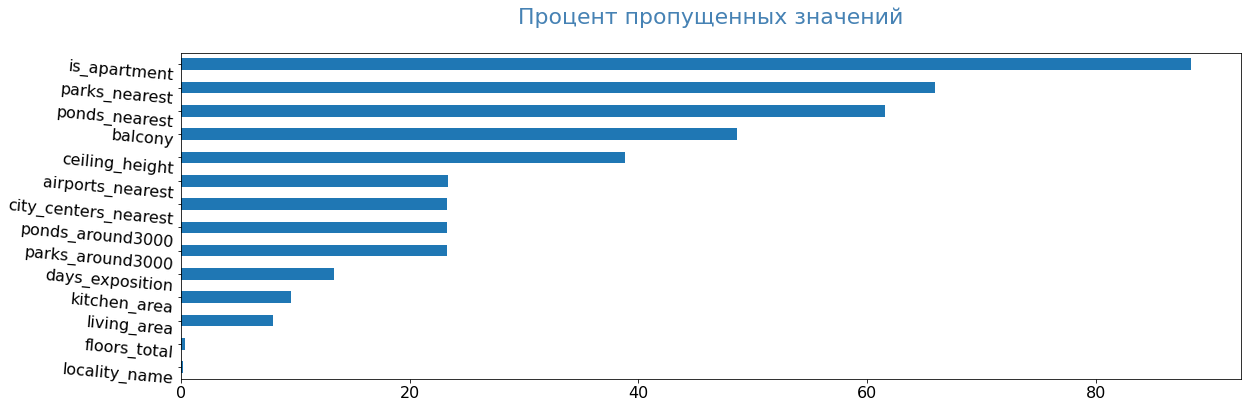

In [13]:
pass_value_barh(df)

Столбец `locality_name`имеет мало пропусков (49 шт.). 
<br>

На самом деле, часть из них мы можем заполнить, а оставшуюся часть просто отбросить или пометить как `Unknown`. Изучив Санкт-Петебург с помощью Яндекс Карт и воспользовавшись инструментом "линейка", можем видеть, что крайняя точка по радиусу от центра до КАД может достигать 18 км (не учитывая дальние населенные пункты - Стрельна, Петергоф, Крондштат и т.п.). Что говорит о том, что объекты, относительно находящиеся в данном расстоянии от центра, можно отнести к Санкт-Петербургу.
<br>

Посмотрим среднюю и медиану по удаленности от центра по городу Санкт-Петербургу с помощью метода `describe`:

In [14]:
df[df['locality_name'] == 'Санкт-Петербург']['city_centers_nearest'].describe()

count   15,660.00
mean    11,601.29
std      4,842.04
min        181.00
25%      8,327.00
50%     12,244.50
75%     14,943.00
max     29,493.00
Name: city_centers_nearest, dtype: float64

Видим, что разница между средним и медианой незначительная. Возьмем что-то между - 12 000 м. Все значения citycenters_nearest, которые меньше или равно 12 000 м, отнесем к Санкт-Петербургу.

In [15]:
df['locality_name'] = df['locality_name'].fillna('Unknown') 
# обозначим пропущенные значения

С помощью цикла и логической индексации заменим пропущенные значения в стобце `locality_name`, если расстояние до центра не более 12 км. Остальное оставим как неизвестные населенные пункты:

In [16]:
for row in range(len(df)): 
    if (df.loc[row, 'city_centers_nearest'] <= 12000) & (df.loc[row, 'locality_name'] == 'Unknown'):
        df.loc[row, 'locality_name'] = 'Санкт-Петербург'

In [17]:
df['locality_name'].isna().sum() # видим, что в столбце `locality_name` больше нет пропусков

0

Очень много пропущенных значений в столбе `is_apartment`. Посмотрим какие значения он принимает:

In [18]:
df['is_apartment'].value_counts() 

False    2725
True       50
Name: is_apartment, dtype: int64

Можем допустить, что к апартаментам относится не так много объектов. Заполним все пропущенные значения False:

In [19]:
df['is_apartment'] = df['is_apartment'].fillna(False) 

Сразу переведем дату в столбце `first_day_exposition` в понятный нам формат:

In [20]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
# время можно не трогать, так как оно всё равно там не указано.

Приведем тип данных в столбце `last_price` к типу `int`:

In [21]:
df['last_price'] = df['last_price'].astype('int') 

Прежде чем заполнить пустые значение по высоте потолков, стоит обратить внимание, что центр Петербурга славится тем, что, как правило, потолки там выше стандартных 2.4 и 2.7 м. Посмотрим с помощью метода `describe` сначала общие статистические данные, а потом относящиеся к центру (в диапазоне 7-8 км).

In [22]:
df[['ceiling_height']].describe().T # общие статистические данные по высоте потолков

,count,mean,std,min,25%,50%,75%,max
ceiling_height,"14,504.00",2.77,1.26,1.00,2.52,2.65,2.80,100.00


In [23]:
df.query('city_centers_nearest <= 8000')['ceiling_height'].describe()
 # статистические данные по высоте потолков в центре Петербурга

count   2,415.00
mean        3.10
std         0.85
min         2.00
25%         2.80
50%         3.00
75%         3.28
max        32.00
Name: ceiling_height, dtype: float64

Видим, что среднее и медиана по центру Петербурга и за пределами центра отличаются. Медиана высоты потолков в центре Петербурга равна 3 метра, в то время как за пределами центра - 2,65 метра. Разница более, чем на 10 %. 
<br>

Соответственно приходим к выводу, что пустые значения по высоте потолков в центре Петербурга мы заполним отдельно, при помощи логической индексации:

In [24]:
df.loc[(df['ceiling_height'].isna()) & (df['city_centers_nearest']<=8000), 'ceiling_height'] = df.query('city_centers_nearest <= 8000')['ceiling_height'].median()
# заполняем пустые значения по центру Петербурга

In [25]:
df['ceiling_height'].isna().sum()

7882

Оставшиеся пропущенные значения заменим медианой в высоте потолков по признаку местонахождения. Эта связь не прямая, но вполне логичная. Те минимально оставшиеся значения, которые не заменились по признаку, заполним общей медианой.

In [26]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('locality_name')['ceiling_height'].transform('median'))
# заполнение медианой по признаку местонахождения

In [27]:
df['ceiling_height'].isna().sum()

121

In [28]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
# заполнение оставшихся минимальных пропусков общей медианой

In [29]:
df['ceiling_height'].isna().sum()

0

Пропущенных значений в столбце `ceiling_height` больше нет.

Пропущенные значения в столбцах `living_area` и `kitchen_area` заменим путем рассчета коэффициента.

In [30]:
kof_living_area = df[df['living_area'].isna() == False]['living_area'].mean() / df[df['living_area'].isna() == False]['total_area'].mean()
# рассчитываем коэффициэнт жилой площади

In [31]:
kof_living_area # коэффициэнт жилой площади

0.5734446218294131

In [32]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * kof_living_area)
# заполняем пустые значения путем умножения на коэффициент

In [33]:
df['living_area'].isna().sum() 

0

In [34]:
kof_kitchen_area = df[df['kitchen_area'].isna() == False]['kitchen_area'].mean() / df[df['kitchen_area'].isna() == False]['total_area'].mean()
# рассчитываем коэффициэнт кухонной площади

In [35]:
kof_kitchen_area # коэффициент кухонной площади

0.17398892610297417

In [36]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kof_kitchen_area)
# заполняем пустые значения путем умножения на коэффициент

In [37]:
df['kitchen_area'].isna().sum()

0

В случае с площадями, логично, что жилая и кухонная площадь не должны быть больше и даже равны, чем общая площадь (так как есть гардеробные, чуланы, балконы, которые могут не входят в жилую площадь), поэтому создадим столбец, где будут результаты проверки данных условий:

In [38]:
df['diff_area'] = (df['living_area'] + df['kitchen_area']) >= df['total_area']

Проверим результаты:

In [39]:
df['diff_area'].value_counts()

False    23508
True       191
Name: diff_area, dtype: int64

Видим, что не правдоподобных значений у нас не так много, поэтому мы их удалим:

In [40]:
df = df.query('diff_area != True').reset_index(drop=True)
# удаляем аномальные строки, не забывая сбросить индексы таблицы

In [41]:
df.info() # строки удалены

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23508 entries, 0 to 23507
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23508 non-null  int64         
 1   last_price            23508 non-null  int64         
 2   total_area            23508 non-null  float64       
 3   first_day_exposition  23508 non-null  datetime64[ns]
 4   rooms                 23508 non-null  int64         
 5   ceiling_height        23508 non-null  float64       
 6   floors_total          23422 non-null  float64       
 7   living_area           23508 non-null  float64       
 8   floor                 23508 non-null  int64         
 9   is_apartment          23508 non-null  bool          
 10  studio                23508 non-null  bool          
 11  open_plan             23508 non-null  bool          
 12  kitchen_area          23508 non-null  float64       
 13  balcony         

Пустые значения в столбцах `parks_around3000` и `ponds_around3000` мы заполним нулями, так как это может означать, что ни водоемов, ни парков в радиусе *3 км* нет.

In [42]:
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int')

In [43]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')

In [44]:
df.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11435
locality_name               0
airports_nearest         5478
city_centers_nearest     5455
parks_around3000            0
parks_nearest           15488
ponds_around3000            0
ponds_nearest           14457
days_exposition          3159
diff_area                   0
dtype: int64

Пропуски в столбцах `citycenters_nearest`, `airports_nearest`, `parks_nearest` и `ponds_nearest` закроем "заглушками". Заполнять той же медианой, особенно там, где пропуски очень большие, не совсем корректно. Очевидно, что здесь недостаточно данных, поэтому трогать не будем.

In [45]:
def col_fillna (column, value): # создадим функцию, через которую можно заполнить пропуски "заглушками" 
    df[column] = df[column].fillna(value).astype('int') # и сразу поменять тип данных на int
    return df[column].isna().sum()

In [46]:
col_fillna ('city_centers_nearest', -999)

0

In [47]:
col_fillna ('airports_nearest', -999)

0

In [48]:
col_fillna ('parks_nearest', -999)

0

In [49]:
col_fillna ('ponds_nearest', -999)

0

Сразу допускаем, что там где не указано количество балконов, значит их там нет, поэтому заменим все пустые значения на 0 :

In [50]:
# замена пустых значений в столбце и замена на тип int
col_fillna ('balcony', 0)

0

В столбце `days_exposition`, где указано, сколько дней было размещено объявление от публикации до снятия, будет не совсем корректно заполнять пропуски каким-либо конкретным значением, потому что, пропуск может означать, что объявление до сих пор актуально. Поэтому заполним такими "заглушками" - `-999`, чтобы можно было отбросить эту часть при анализе и так же поменяем тип данных на `int`:

In [51]:
col_fillna ('days_exposition', -999)

0

Пустые значения в колонке `floors_total` мы трогать не будем (их не так много), так как этажность домов достаточно разнообразна в Санкт-Петербурге и додумывать не имеет смысла, но обозначим "заглушками" в виде значения `-999`, чтобы это можно было сразу выделить и отсечь при анализе. Поменяем только тип данных на `int`:

In [52]:
col_fillna ('floors_total', -999)

0

In [53]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
diff_area               0
dtype: int64

По возможности мы заполнили пропущенные значения, изменили тип данных некоторых столбцов для более удобного формата и дальнейшего анализа.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23508 entries, 0 to 23507
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23508 non-null  int64         
 1   last_price            23508 non-null  int64         
 2   total_area            23508 non-null  float64       
 3   first_day_exposition  23508 non-null  datetime64[ns]
 4   rooms                 23508 non-null  int64         
 5   ceiling_height        23508 non-null  float64       
 6   floors_total          23508 non-null  int64         
 7   living_area           23508 non-null  float64       
 8   floor                 23508 non-null  int64         
 9   is_apartment          23508 non-null  bool          
 10  studio                23508 non-null  bool          
 11  open_plan             23508 non-null  bool          
 12  kitchen_area          23508 non-null  float64       
 13  balcony         

#### Устранение явных и неявных дубликатов

Для начала проверим наличие явных дубликатов:

In [55]:
df.duplicated().sum() 

0

Видим, что явных дубликатов нет. Проверим на наличие неявных дубликатов столбец `locality_name`:

In [56]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [57]:
df['locality_name'].nunique() # количество уникальных названий

365

Сразу заменим `ё` на `е` через функцию `replace`:

In [58]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')

Далее, предлагаем оставить только названия населенных пунктов. Создадим список с повторяющимися типами населенных пунктов и потом, с помощью цикла, уберем типы из столбца.

In [59]:
tp = ['городской поселок', 'поселок городского типа', 'коттеджный поселок', 'поселок при железнодорожной станции',
      'поселок станции', 'поселок', 'деревня', 'садовое товарищество', 'село', 'садоводческое некоммерческое товарищество']
# список с типами населенных пунктов

In [60]:
for local in df['locality_name'].unique(): # проходим по уникальным значениям названий населенных пунктов
    for index in range(len(tp)): # проходим по индексам списка типов населенных пунктов
        if tp[index] in local: # условие при котором проверяем, есть ли в столбце locality_name часть с типом населенного пункта
            df['locality_name'] = df['locality_name'].replace(local, local[len(tp[index]):]) # удаляем из названия тип населенного пункта

In [61]:
df['locality_name'] = df['locality_name'].str.strip().copy() # удаляем пробелы слева в строке

In [62]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [63]:
df['locality_name'].nunique()

306

Удалось сократить уникальные значения с 365 шт. до 306 шт.

#### Устранение аномалий в столбцах

Давайте посмотрим общую картину столбцов, где могут быть аномалии:

In [64]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,508.00","23,508.00","23,508.00","23,508.00","23,508.00","23,508.00","23,508.00","23,508.00","23,508.00"
min,0.00,13.00,1.00,-999.00,"12,190.00",2.00,1.30,1.00,-999.00
max,19.00,900.00,32.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


Видим, что безусловно каждый столбец можно проработать.
<br>

В столбце `rooms` - это *0* и *19 комнат*, в столбце `ceiling_height` - высота потолка *1 м* и *32 м*, в столбце `last_price` - жилье за *12 тыс.* и за *763 млн.*, в столбце `living_area` - жилая площадь - *2 кв.м*, в столбце `floors_total` - *60 этажей*. Всё это мы проверим и изучим.
<br>
Где-то выскочили наши "заглушки", там определенно нужно будет изучить минимальные значения.

Посмотрим как много минимальных и максимальных значений в столбце:

In [65]:
df['ceiling_height'].sort_values(ascending=False).head(30)

22155   32.00
3122    32.00
5763    27.00
20313   27.00
2141    27.00
10686   27.00
22753   27.00
5206    27.00
4839    27.00
17711   27.00
5625    26.00
11191   25.00
353     25.00
6200    25.00
9305    25.00
4608    25.00
18396   25.00
14257   25.00
5038    24.00
20341   22.60
17353   20.00
14934   14.00
9988    13.85
9990    13.85
311     13.85
22128   10.30
5819     8.30
3446     8.00
17300    8.00
15611    8.00
Name: ceiling_height, dtype: float64

In [66]:
df['ceiling_height'].sort_values(ascending=True).head(30)

22408   1.00
5668    1.20
16795   1.75
11257   2.00
16312   2.00
19175   2.00
20354   2.00
546     2.00
4181    2.00
2553    2.00
22775   2.00
5806    2.00
18945   2.00
16746   2.00
17649   2.25
17617   2.30
1570    2.30
5454    2.30
23308   2.30
225     2.34
2219    2.40
20398   2.40
3604    2.40
15313   2.40
13341   2.40
13152   2.40
10081   2.40
5874    2.40
15322   2.40
21230   2.40
Name: ceiling_height, dtype: float64

Проанализировав инофрмацию, можем увидеть, что в потолках высотой от *20 м* до *32 м*, вероятнее всего, ошиблись с плавающей точкой, и это потолки *2.4 м*, *2,5 м*, *2,7 м*, *3.2 м*. Поэтому мы просто поделим эти значения на 10. Оставим значения и *2 м*, так как не забываем, что есть жилье, немного уходящее ниже 1 этажа, где высота считается от уровня пола 1-го этажа.
<br>

Всё, что ниже *2 метров*, мы удалим. Значения *13* и *14 метров* тоже маловероятны. Мы их так же поделим на 10 и избавимся от них. А вот, изучив информацию в сети, узнали, что потолки до 10 м включая, вполне возможны в элитном жилье, где подразумевается 2-х этажная планировка, поэтому промежуточные значения (меньше *10 м*) мы оставим.

In [67]:
df.loc[(df.ceiling_height > 10) & (df.ceiling_height < 35), 'ceiling_height'] /= 10 
# исправляем аномальные значения с помощью логической индексации

In [68]:
df = df.loc[~(df.ceiling_height < 2)].reset_index(drop=True) # удаляем аномальные значения

In [69]:
df['ceiling_height'].sort_values()

18939   2.00
11253   2.00
22767   2.00
545     2.00
16741   2.00
        ... 
20094   6.00
3445    8.00
15606   8.00
17294   8.00
5817    8.30
Name: ceiling_height, Length: 23500, dtype: float64

Преобразование прошло успешно

Далее изучим столбец `rooms`. Посмотрим количество жилых объектов с тем или иным количеством комнат. 
<br>

Отдельно мы изучим значение, где комнаты равны нулю. Особое внимание обратим на их принадлежность к студиям и открытым планировкам, потому что формально, в жилье такого типа, нет понятия как однокомнатная квартира, квартира с 1-й комнатной и т.д. Поэтому если эти "нулевые" комнаты относятся к данном виду жилья, менять или удалять мы их не будем.

In [70]:
df.rooms.value_counts().to_frame() 

,rooms
1,7967
2,7881
3,5780
4,1177
5,323
0,179
6,104
7,59
8,11
9,8


Значение с "нулевым" количеством комнат равно *179 шт*. Проверим принадлежность данных объектам к апартаментам, студиям и открытой планировке.

In [71]:
df.query('rooms == 0 and is_apartment == True')['is_apartment'].count() # отношение к апартаментам

0

In [72]:
df.query('rooms == 0 and open_plan == True')['open_plan'].count() # отношение к отрытой планировке

54

In [73]:
df.query('rooms == 0 and studio == True')['studio'].count() # отношение к студии

125

Прекрасно видим, что абсолютно все объекты с "нулевыми" комнатами относятся к студиям и открытой планировке, поэтому трогать и изменять мы их не будем.

Построим "ящик с усами" для того, чтобы посмотреть явные выбросы из столбца:

<AxesSubplot:>

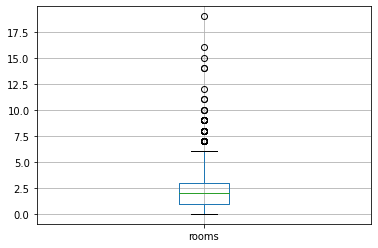

In [74]:
df.boxplot('rooms') 

"Ящик с усами" показывает нам, что всё, что больше *6 комнат*, является выбросами. Этих значений действительно не так много из общей выборки. Но всё таки, есть предложение удалить только варианты, где больше *9 комнат*, потому что стоит не забывать, что мы изучаем столицу коммунальных квартир, и большое количество комнат допустимо в редких случаях. 
<br>

Как факт, официально зарегистрированная коммунальная квартира на Лиговском проспекте имеет 34 комнаты.

In [75]:
df = df[~(df.rooms > 9)].reset_index(drop=True) # удаляем лишнее

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23489 entries, 0 to 23488
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23489 non-null  int64         
 1   last_price            23489 non-null  int64         
 2   total_area            23489 non-null  float64       
 3   first_day_exposition  23489 non-null  datetime64[ns]
 4   rooms                 23489 non-null  int64         
 5   ceiling_height        23489 non-null  float64       
 6   floors_total          23489 non-null  int64         
 7   living_area           23489 non-null  float64       
 8   floor                 23489 non-null  int64         
 9   is_apartment          23489 non-null  bool          
 10  studio                23489 non-null  bool          
 11  open_plan             23489 non-null  bool          
 12  kitchen_area          23489 non-null  float64       
 13  balcony         

Изучим столбец `last_price`:

In [77]:
df['last_price'].sort_values(ascending=False)

12848    763000000
14571    401300000
1421     330000000
15508    300000000
22629    289238400
           ...    
9499        450000
16130       440000
14776       430000
17302       430000
8717         12190
Name: last_price, Length: 23489, dtype: int64

Очевидно, что есть аномальные значения в виде минимального и максимального значения. Маловероятно, что какая-либо недвижимость будет стоить *12 190 руб.* За *400 + млн* возможно какое-либо элитное жилье, особенно на Крестовском острове. За *763 млн.* маловероятно. Поэтому, можем удалить эти 2 строчки с помощью функции `drop`.

In [78]:
df = df.drop(labels = [8717, 12848], axis = 0) 

In [79]:
df[['last_price']].describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,"23,487.00","6,479,319.40","9,288,904.62","430,000.00","3,431,750.00","4,650,000.00","6,790,000.00","401,300,000.00"


Так же имеет смысл проверить все объекты, которые продаются меньше, чем за *1 млн* в Санкт-Петербурге. Так как если в регионе такое возможно, то в Санкт-Петербурге маловерятно.

In [80]:
df[(df.last_price < 1000000) & (df.locality_name == 'Санкт-Петербург')]['last_price'].count()

0

Всё хорошо, таких объектов нет. Идем далее.

Изучим столбец `floors_total`. Посмотрим минимальные и максимальные значения.

In [81]:
df[df.floors_total != -999]['floors_total'].sort_values()

14701     1
19416     1
18734     1
23289     1
17587     1
         ..
5757     36
394      36
10979    36
16583    52
2233     60
Name: floors_total, Length: 23401, dtype: int64

Сразу обозначим следующее, что самое высокий жилой комплекс Санкт-Петербурга на 2019 год был ЖК "Князь Александр Невский" с 37 этажами. Следующие по высоте жилые комплексы идут сразу же 25-этажные и 24-этажные. 
<br>

В связи с этим, есть предложение удалить всё, что выше 25 этажа. Так же удалим 1-этажные объекты, так как 2-х этажные многоквартирные дома есть, даже в самом Петербурге, то 1-этажные - маловероятно.

In [82]:
df[df.floors_total > 25]['floors_total'].count()

337

In [83]:
df[(df.floors_total != -999) 
   & (df.floors_total < 2) 
   ]['floors_total'].count()

24

Избавляемся от ненужных строк:

In [84]:
df = df[~(df.floors_total > 25)].reset_index(drop=True) 

In [85]:
df =df[~(df.floors_total < 2)].reset_index(drop=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23040 entries, 0 to 23039
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23040 non-null  int64         
 1   last_price            23040 non-null  int64         
 2   total_area            23040 non-null  float64       
 3   first_day_exposition  23040 non-null  datetime64[ns]
 4   rooms                 23040 non-null  int64         
 5   ceiling_height        23040 non-null  float64       
 6   floors_total          23040 non-null  int64         
 7   living_area           23040 non-null  float64       
 8   floor                 23040 non-null  int64         
 9   is_apartment          23040 non-null  bool          
 10  studio                23040 non-null  bool          
 11  open_plan             23040 non-null  bool          
 12  kitchen_area          23040 non-null  float64       
 13  balcony         

Далее перейдем к изучению столбца `living_area`:

In [87]:
df['living_area'].sort_values()

21154     2.00
13521     2.00
3156      3.00
22919     3.00
17095     5.00
         ...  
639     312.50
12494   322.30
4132    332.00
12055   347.50
3034    361.84
Name: living_area, Length: 23040, dtype: float64

Что касается большой жилой площади, в Петербурге только в историческом центре насчитывается порядка 30 квартир с жилой площадью более *500 кв.м.*, поэтому цифры в *300-360 кв.м.* нас абсолютно не должны смущать.
<br>

Но вот маленькие площади уже наводят на подозрения. Одни из самых маленьких квартир, студий в том же Петербурге идут площадью около *11 кв.м.* На площадях размерами *2, 3, 5 кв.м.* жить невозможно, это похоже на выбросы, поэтому отсеиваем все варианты с жилой площадью менее *11 кв.м.*

In [88]:
df[df.living_area < 11]['living_area'].count() # таких жилых объектов у нас нашлось 84 шт

84

In [89]:
df = df[~(df.living_area < 11)].reset_index(drop=True) # удаляем лишнее

In [90]:
df.info() # проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22956 entries, 0 to 22955
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22956 non-null  int64         
 1   last_price            22956 non-null  int64         
 2   total_area            22956 non-null  float64       
 3   first_day_exposition  22956 non-null  datetime64[ns]
 4   rooms                 22956 non-null  int64         
 5   ceiling_height        22956 non-null  float64       
 6   floors_total          22956 non-null  int64         
 7   living_area           22956 non-null  float64       
 8   floor                 22956 non-null  int64         
 9   is_apartment          22956 non-null  bool          
 10  studio                22956 non-null  bool          
 11  open_plan             22956 non-null  bool          
 12  kitchen_area          22956 non-null  float64       
 13  balcony         

Проверим столбцы `total_area` и `kitchen_area`:

In [91]:
df['total_area'].sort_values()

19027    14.00
9129     16.00
9898     17.00
686      17.00
5910     18.00
         ...  
7780    507.00
4118    517.00
15163   618.00
3022    631.00
12451   631.20
Name: total_area, Length: 22956, dtype: float64

In [92]:
df['kitchen_area'].sort_values()

19590     1.30
20756     2.00
19027     2.00
15865     2.00
6078      2.00
         ...  
10532    87.20
16277    93.00
15740    93.20
2415    100.70
19588   107.00
Name: kitchen_area, Length: 22956, dtype: float64

В данных столбцах, учитывая уже сделанные изменения в таблице, нет причин предполагать, что есть какие-либо сильные выбросы. С учетом и маленьких, и больших жилых объектов, все эти значения вполне реальны.

Рассмотрим поближе столбец `days_exposition`:

In [93]:
df[df.days_exposition > 730]['days_exposition'].sort_values() # посмотрим объекты, которые продаются более 2 лет

6408      731
18317     731
17737     731
4620      732
5210      732
         ... 
20323    1512
1824     1513
9266     1553
1070     1572
18258    1580
Name: days_exposition, Length: 737, dtype: int64

Могут ли объекты продавать более 2-3 лет? Вероятно, да, учитывая, что от общего количества их не так много. Нет оснований удалять эти значения.

In [94]:
df[(df.days_exposition > 0) & (df.days_exposition < 3)]['days_exposition'].sort_values()

1581     1
12643    2
15555    2
15714    2
Name: days_exposition, dtype: int64

Можно продать квартиру путем "Срочного выкупа", обычно занимает от 3 до 14 дней. Уберем всё, что меньше 3 дней. Мало похоже на правду.

In [95]:
df = df[~((df.days_exposition > 0) & (df.days_exposition < 3))].reset_index(drop=True)

In [96]:
df.info() # проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22952 entries, 0 to 22951
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22952 non-null  int64         
 1   last_price            22952 non-null  int64         
 2   total_area            22952 non-null  float64       
 3   first_day_exposition  22952 non-null  datetime64[ns]
 4   rooms                 22952 non-null  int64         
 5   ceiling_height        22952 non-null  float64       
 6   floors_total          22952 non-null  int64         
 7   living_area           22952 non-null  float64       
 8   floor                 22952 non-null  int64         
 9   is_apartment          22952 non-null  bool          
 10  studio                22952 non-null  bool          
 11  open_plan             22952 non-null  bool          
 12  kitchen_area          22952 non-null  float64       
 13  balcony         

По возможности мы обозначили, где есть аномалии. От всех видимых аномалий мы постарались избавиться. Поэтому можем продвигаться дальше в нашем исследовании.

### Формирование новых столбцов

В данном разделе нам нужно выполнить следующие задачи:

- посчитать и добавить в таблицу: цену одного квадратного метра
- посчитать и добавить в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- посчитать и добавить в таблицу: месяц публикации объявления
- посчитать и добавить в таблицу: год публикации объявления
- посчитать и добавить в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- посчитать и добавить в таблицу: расстояние в км до центра города

In [99]:
#посчитаем цену квадратного метра и для удобства переведем тип данных в int
df['sq_metr_pr'] = (df['last_price'] / df['total_area']).astype('int')

In [100]:
#создадим столбец дня недели
df['weekday'] = df['first_day_exposition'].dt.weekday

In [101]:
#создадим столбец месяца
df['month'] = df['first_day_exposition'].dt.month

In [102]:
#создадим столбец года
df['year'] = df['first_day_exposition'].dt.year

Напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1:

In [103]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    else:
        return 'Unknown'
    


In [104]:
#категоризуем этажи с помощью функции  
df['floor_category'] = df.apply(floor_category, axis = 1)

In [105]:
df['floor_category'].value_counts()

другой       16852
последний     3264
первый        2836
Name: floor_category, dtype: int64

Далее создаем столбец с расстоянием до центра в км и с помощью ранее созданной функции заполняем пропуски заглушками и переводим тип данных в `int`:

In [106]:
df['city_centers_km'] = df.loc[df.city_centers_nearest != - 999, 'city_centers_nearest'].div(1000)

In [107]:
col_fillna ('city_centers_km', -999)

0

Проверим остались ли у нас пропуски в каких-либо новых столбцах:

In [108]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
diff_area               0
sq_metr_pr              0
weekday                 0
month                   0
year                    0
floor_category          0
city_centers_km         0
dtype: int64

Добавили все столбцы, которые требовалось и сделали их предобработку. 

### Исследовательский анализ данных

В данном разделе нам нужно изучить и описать следующие параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления
  


Построим гистограмму по площадям квартир:

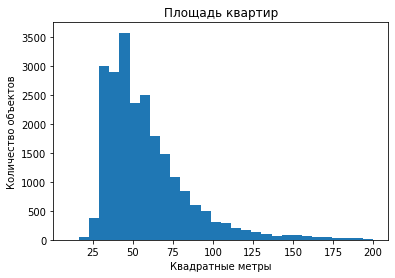

In [109]:
plt.hist(df['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

In [110]:
df[['total_area']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_area,"22,952.00",60.51,34.95,14.00,40.20,52.00,70.00,631.20


In [111]:
df['total_area'].sort_values(ascending=False)

12450   631.20
3021    631.00
15161   618.00
4117    517.00
7779    507.00
         ...  
5909     18.00
9897     17.00
686      17.00
9128     16.00
19023    14.00
Name: total_area, Length: 22952, dtype: float64

Видим, что большая часть объектов имеет площадь примерно от 30 до 48 кв.м. Та небольшая часть объектов, которая имеет достаточно большую площадь (100+ кв.м.), вероятно, относится к элитному жилью, коммунальным квартирам и подобным объектам недвижимости.

Построим гистограмму по жилым площадям:

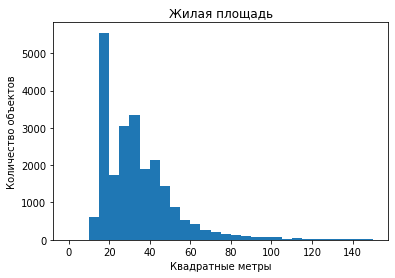

In [112]:
plt.hist(df['living_area'], bins=30, range=(0,150))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

In [113]:
df[['living_area']].describe().T

,count,mean,std,min,25%,50%,75%,max
living_area,"22,952.00",34.71,21.90,11.00,19.00,30.00,42.30,361.84


In [114]:
df['living_area'].sort_values(ascending=False)

3021    361.84
12011   347.50
4117    332.00
12450   322.30
636     312.50
         ...  
6301     11.00
16952    11.00
9670     11.00
20841    11.00
16875    11.00
Name: living_area, Length: 22952, dtype: float64

Изучив гистограмму, можно сказать, что значительная часть жилой площади приходится примерно на 17-19 кв.м. и на 26-35 кв.м. Исходя из этого, можно сделать вывод, что максимально привлекательны и подъемны, по цене в том числе, небольшие однокомнатные квартиры. 

Построим гистограмму по площадям кухни:

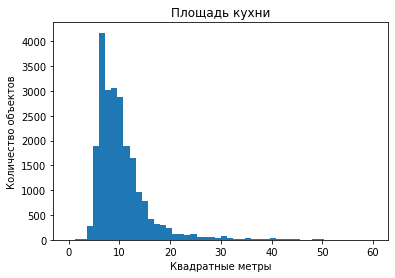

In [115]:
plt.hist(df['kitchen_area'], bins=50, range=(0,60))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

In [116]:
df[['kitchen_area']].describe().T

,count,mean,std,min,25%,50%,75%,max
kitchen_area,"22,952.00",10.44,5.93,1.30,7.00,9.00,11.90,107.00


In [117]:
df['kitchen_area'].sort_values(ascending=False)

19584   107.00
2414    100.70
15736    93.20
16273    93.00
10531    87.20
         ...  
19023     2.00
10687     2.00
8861      2.00
6077      2.00
19586     1.30
Name: kitchen_area, Length: 22952, dtype: float64

После изучения данных, можно сделать вывод, что большая часть площадей кухни колеблется в пределах 7-12 кв.м. После отметки 15 кв.м, кухонь с большими площадями становится резко меньше. Большие кухни очевидно относятся к объектам жилой недвижимости с большой площадью.
<br>
Более маленькие значения могут относиться к небольшим кухонным зонам в комнате/студии.

Построим гистограмму по стоимости квартир:

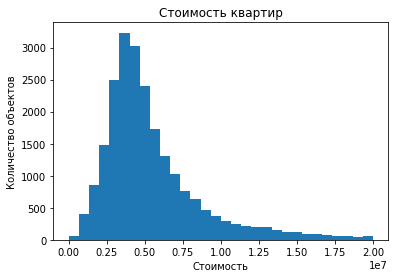

In [118]:
plt.hist(df['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество объектов')
plt.show()

In [119]:
df[['last_price']].describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,"22,952.00","6,511,210.69","9,373,758.24","430,000.00","3,450,000.00","4,650,000.00","6,800,000.00","401,300,000.00"


In [120]:
df['last_price'].sort_values(ascending=False)

14244    401300000
1390     330000000
15161    300000000
22115    289238400
15952    245000000
           ...    
9292        450000
15716       450000
15769       440000
14441       430000
16916       430000
Name: last_price, Length: 22952, dtype: int64

Изучив информацию, можно сделать вывод о том, что популярны квартиры от *2,5* до *6 млн*. Вероятно это вызвано тем, что новостройки стали активно продвигать студии, небольшие однокомнатные квартиры. Жилье более *300-350 млн.* действительно есть в Санкт-Петербурге, если мы откроем Яндекс Недвижимость, например, на Крестовском острове. За цены *400-900 тыс.* могут продаваться маленькие комнаты, но, вероятно, не в Санкт-Петербурге, что мы проверяли выше.

Построим гистограмму по количеству комнат:

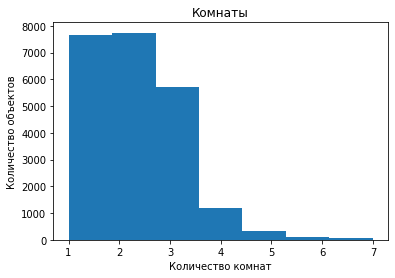

In [121]:
plt.hist(df['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов')
plt.show()

In [122]:
df[['rooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,"22,952.00",2.08,1.05,0.00,1.00,2.00,3.00,9.00


In [123]:
df['rooms'].sort_values(ascending=False)

12603    9
8591     9
12969    9
8553     9
9262     9
        ..
17970    0
15116    0
14627    0
4810     0
11332    0
Name: rooms, Length: 22952, dtype: int64

Изучив информацию, видим абсолютно классическое распределение 1-комнатных, 2-комнатных и 3-комнатных квартир. Всё что идёт выше 4 комнат, резко уменьшается по количеству квартир. Есть значения, где присутствуют объекты с количеством от 7 до 9 комнат. Их можно интерпретировать как количество комнат в коммунальной квартире, либо количесто комнат в элитном жилье, которого в Петербурге немало.

Построим гистограмму по высоте потолков:

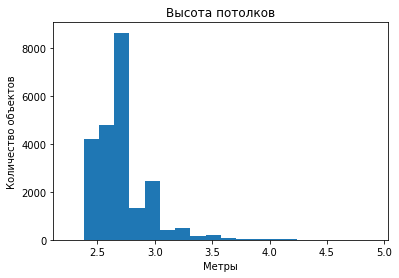

In [124]:
plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 5)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.show()

In [125]:
df[['ceiling_height']].describe().T

,count,mean,std,min,25%,50%,75%,max
ceiling_height,"22,952.00",2.72,0.25,2.00,2.55,2.70,2.75,8.30


In [126]:
df['ceiling_height'].sort_values(ascending=False)

5694    8.30
3370    8.00
16902   8.00
15253   8.00
19631   6.00
        ... 
15937   2.00
18724   2.00
4092    2.00
16359   2.00
531     2.00
Name: ceiling_height, Length: 22952, dtype: float64

Большинство значений по высоте потолков вписывается в стандартные от 2,4 до 2,7 м. После значений в 3 м, которые в большинстве своем относятся к центру Петербурга или старому жилому фонду (не обязательно центр), количество объектов резко уменьшается. 

Построим гистограмму по этажам квартир:

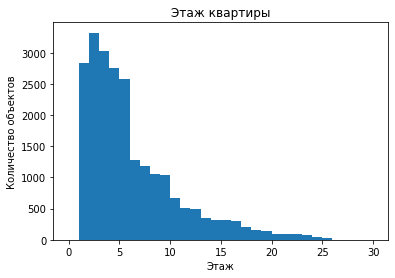

In [127]:
plt.hist(df['floor'], bins=30, range=(0,30))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество объектов')
plt.show()

In [128]:
df[['floor']].describe().T

,count,mean,std,min,25%,50%,75%,max
floor,"22,952.00",5.73,4.66,1.00,2.00,4.00,8.00,25.00


In [129]:
df['floor'].sort_values(ascending=False)

20118    25
13876    25
4596     25
10222    25
13949    25
         ..
10013     1
10012     1
10003     1
9989      1
22951     1
Name: floor, Length: 22952, dtype: int64

Исследовав график, видим, что большинство квартир продаются с 1 по 6 этаж. После примерно 7 этажа начинается спад.

Построим гистограмму по типу этажей квартиры:

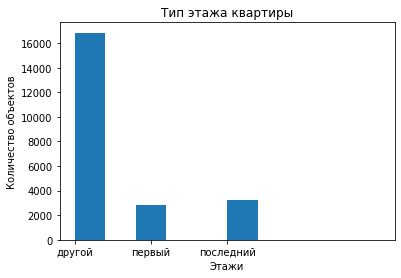

In [130]:
plt.hist(df['floor_category'], bins=10, range=(0,4))
plt.title('Тип этажа квартиры')
plt.xlabel('Этажи')
plt.ylabel('Количество объектов')
plt.show()

In [131]:
df['floor_category'].value_counts()

другой       16852
последний     3264
первый        2836
Name: floor_category, dtype: int64

Четко видим, что распределение по типу этажности между первым и последним этажом примерно одинаковое. Все остальное, и это абсолютное большинство, логично находится между этими двумя этажами.

Построим гистограмму по общему количеству этажей в доме:

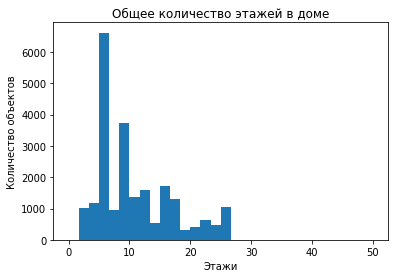

In [132]:
plt.hist(df.query('floors_total > 0')['floors_total'], bins=30, range=(0, 50))
plt.title('Общее количество этажей в доме')
plt.xlabel('Этажи')
plt.ylabel('Количество объектов')
plt.show()

In [133]:
df.query('floors_total > 0')['floors_total'].describe()

count   22,952.00
mean        10.42
std          6.29
min          2.00
25%          5.00
50%          9.00
75%         15.00
max         25.00
Name: floors_total, dtype: float64

In [134]:
df.query('floors_total > 0')['floors_total'].sort_values(ascending=False)

11041    25
2076     25
11348    25
2070     25
2063     25
         ..
19420     2
17048     2
16585     2
12153     2
10219     2
Name: floors_total, Length: 22952, dtype: int64

Большинство зданий в объявлениях 6-7 этажей, 9-10 этажей.

Построим гистограмму по расстояниям до центра города в метрах:

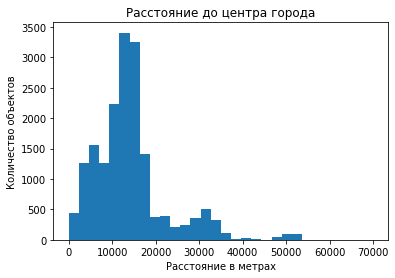

In [135]:
plt.hist(df.query('city_centers_nearest > 0')['city_centers_nearest'], bins=30, range=(0, 70000))
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество объектов')
plt.show()

In [136]:
df.query('city_centers_nearest > 0')['city_centers_nearest'].describe().T

count   17,638.00
mean    14,138.93
std      8,645.04
min        181.00
25%      9,162.25
50%     13,029.50
75%     16,185.25
max     65,968.00
Name: city_centers_nearest, dtype: float64

In [137]:
df.query('city_centers_nearest > 0')['city_centers_nearest'].sort_values(ascending=False)

9350     65968
5185     65952
556      65764
20104    65105
5067     64857
         ...  
20227      291
1870       287
8354       215
1142       208
13259      181
Name: city_centers_nearest, Length: 17638, dtype: int64

Срезом отсеяли заглушки. Видим, что большая часть объектов находится на расстоянии 10000-17000 м от центра. Учитывая, что в пределах КАД возможна удаленность до 18000 м (не считая отдаленных локаций типа Крондштата и т.п.), то с уверенность можем сказать, что большая часть продается в Санкт-Петербурге.

Построим гистограмму по расстояниям до блжайшего аэропорта:

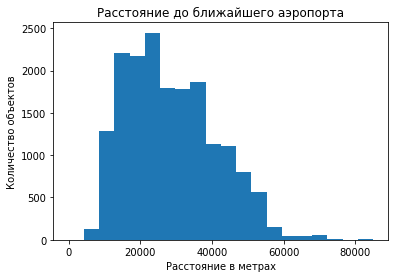

In [138]:
plt.hist(df.query('airports_nearest > 0')['airports_nearest'], bins=20, range=(0, 85000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество объектов')
plt.show()

In [139]:
df.query('airports_nearest > 0')['airports_nearest'].describe()

count   17,614.00
mean    28,621.36
std     12,502.97
min      6,450.00
25%     18,495.25
50%     26,600.50
75%     36,912.00
max     84,869.00
Name: airports_nearest, dtype: float64

In [140]:
df.query('airports_nearest > 0')['airports_nearest'].sort_values(ascending=False)

9350     84869
5185     84853
556      84665
20104    84006
5067     83758
         ...  
9752      6989
22425     6949
7544      6914
3902      6450
12488     6450
Name: airports_nearest, Length: 17614, dtype: int64

Срезом отсеяли поставленные "заглушки". Изучив график, впринципе видим, что он совпадает с реальностью, несмотря на отсеянные данные. Расстояние от центра Санкт-Петербурга до аэропорта "Пулково" около 21 км. Учитывая разбросанность объектов по городу и вне его, ожидаемо, что большая часть будет находиться достаточно далеко от аэропорта.
<br>

Большинство объектов находятся на расстоянии примерно от 14 до 25 км от аэропорта. Чуть меньше объектов, но так же много, примерно от 26 до 38 км от аэропорта. 

Построим гистограмму по расстояниям до ближайшего парка:

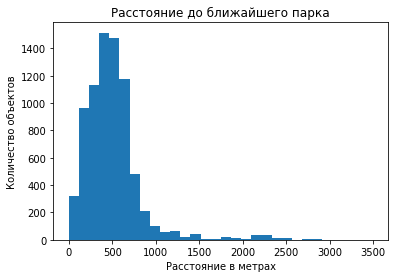

In [141]:
plt.hist(df.query('parks_nearest > 50')['parks_nearest'], bins=30, range=(0, 3500))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество объектов')
plt.show()

In [142]:
df.query('parks_nearest > 50')['parks_nearest'].describe()

count   7,722.00
mean      502.06
std       336.74
min        51.00
25%       303.00
50%       460.00
75%       617.00
max     3,190.00
Name: parks_nearest, dtype: float64

In [143]:
df.query('parks_nearest > 50')['parks_nearest'].sort_values(ascending=False)

18820    3190
10616    3190
1541     3064
18607    3013
22356    2984
         ... 
6599       51
2183       51
12747      51
18409      51
14445      51
Name: parks_nearest, Length: 7722, dtype: int64

Срезом отсеяли досточно много отсутствующих данных ("заглушки") по данному параметру, так как очевидно, что не возле каждого объекта недвижимости может быть парк. Агенты или собственники, если парка нет хотя бы в 3 км от объекта, наверняка не видят смысла в расчете расстояния до ближашего парка, и это логично. Так же взяли срез, учитывая, что парк находится хотя бы в 50 метрах, а не в 1 м от объекта.
<br>

Изучив данные около 8000 объектов, где есть парки в пределах примерно 3 км, большинство парков находится в расстоянии 300-600 м от объектов недвижимости. Вполне реальный результат из такой выборки. Так как Санкт-Петербург действительно славится большим количеством парков, садов и скверов.


Построим гистограмму по дням публикации объявлений:

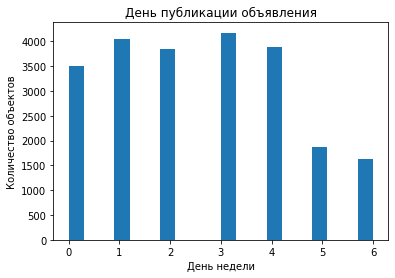

In [144]:
plt.hist(df['weekday'], bins=20, range=(0,6))
plt.title('День публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество объектов')
plt.show()

In [145]:
df['weekday'].value_counts()

3    4173
1    4040
4    3887
2    3852
0    3494
5    1870
6    1636
Name: weekday, dtype: int64

Исходя из графика, можем смело сделать вывод, что большинство объявлений публикуется в будние рабочие дни.

Построим гистограмму по месяцам публикации объявлений:

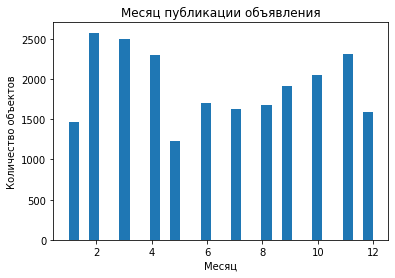

In [146]:
plt.hist(df['month'], bins=30, range=(1,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество объектов')
plt.show()

In [147]:
df['month'].value_counts()

2     2578
3     2502
11    2310
4     2297
10    2049
9     1915
6     1702
8     1681
7     1632
12    1594
1     1462
5     1230
Name: month, dtype: int64

Исходя из графика, можем сделать вывод, что основной пик публикации объявлений выпадает на весенние месяца. Летом происходит затишье, а осенью публикации снова начинают набирать обороты.

Изучим, как быстро продавались квартиры (столбец days_exposition). Для этого построим гистограмму:

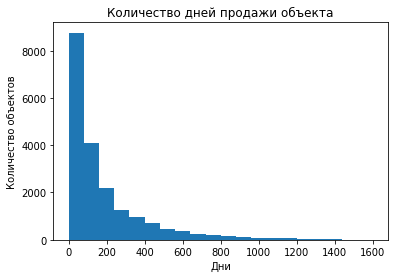

In [148]:
plt.hist(df['days_exposition'], bins=20, range=(0,1600))
plt.title('Количество дней продажи объекта')
plt.xlabel('Дни')
plt.ylabel('Количество объектов')
plt.show()

In [149]:
df.query('days_exposition > 0')['days_exposition'].describe()

count   19,859.00
mean       181.77
std        220.72
min          3.00
25%         45.00
50%         96.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

In [150]:
df.query('days_exposition > 0')['days_exposition'].sort_values(ascending=False)
# срез с отсеиванием объявлений по объектам, которые ещё не проданы

18254    1580
1070     1572
9265     1553
1823     1513
20319    1512
         ... 
3809        3
13365       3
19812       3
8739        3
7422        3
Name: days_exposition, Length: 19859, dtype: int64

In [151]:
df.query('days_exposition == -999')['days_exposition'].count() # проверка количества непроданных объектов

3093

Внимательно изучив данные, можем сказать, что большинство объектов недвижимости продается в первые 100 дней публикации объявлений (грубо говоря, в течении 3 месяцев). Затем количество дней увеличивается в геометрической прогрессии. Есть объявления, которые опубликованы уже порядка 4,5 лет. Это можно допускать под предлогом того, что объект максимально неликвиден.
<br>

Среднее как мы видим у нас равно 180 дням, как раз из-за таких неликвидных объектов. Более точная, в нашем случае, медиана показывает, что продажа занимает 95 дней. 
<br>

Из этого можно сделать вывод, что всё что продается в течении 2 месяцев (30-60 дней), можно назвать быстрой продажей, учитывая что это за товар. Всё что продается больше 180 дней (более 6 мес.), можно обозначить уже как долгую продажу. Необычно долгими можно обозначить объекты, которые продаются уже более 400-500 дней (более 1,5-2 лет).


Далее попробуем узнать следующее: "Какие факторы больше всего влияют на общую (полную) стоимость объекта?" Построим графики, которые покажут зависимость цены от указанных ниже параметров:

- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

Создадим функцию, которая позволит нам построить график рассеивания и покажет корреляцию между столбцами:

In [152]:
def corr1(column):
    print('Корелляция цены от', column, df['last_price'].corr(df[column]))
    df.plot(x=column, y='last_price', kind='scatter', grid=True, figsize=(15,6), alpha=0.3)

Далее строим графики и изучаем информацию по полученным результатам, благодаря созданной функции.

Корелляция цены от total_area 0.6967659654956294


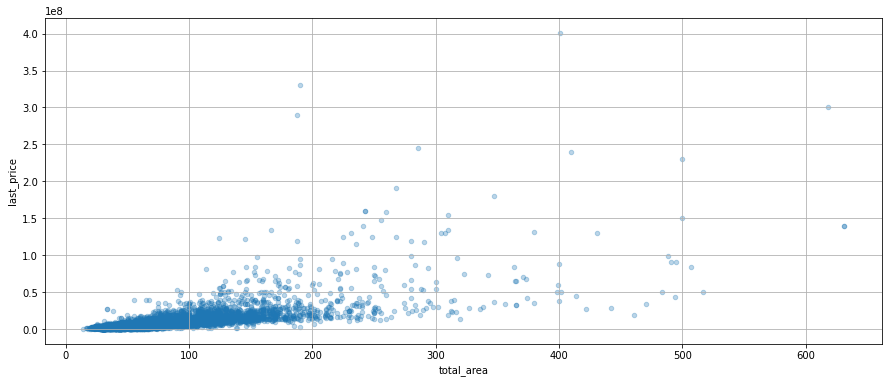

In [153]:
corr1 ('total_area') # зависимость от общей площади

Изучив график и коэффициент корреляции, видим что зависимость конечной цены от общей площади точно выше среднего, поэтому можем назвать это прямой зависимостью.

Корелляция цены от living_area 0.6243598031501456


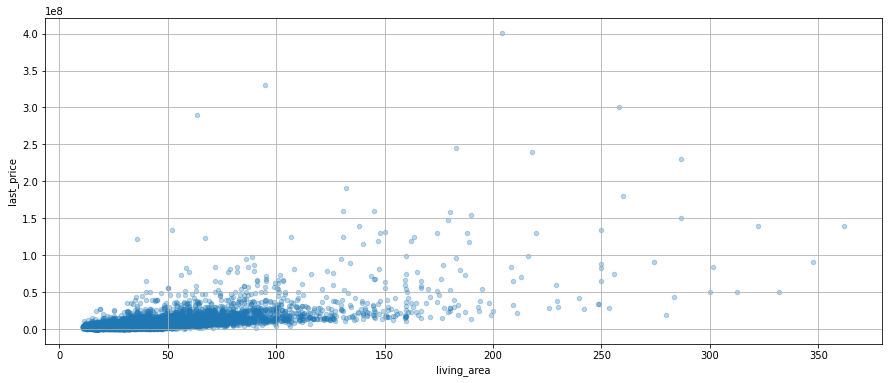

In [154]:
corr1 ('living_area') # зависимость от жилой площади

Видим, что зависимость конечной цены от жилой площади выше среднего, так же как и у общей площади. Было бы странно предполагать, если бы было иначе.

Корелляция цены от kitchen_area 0.542316897263902


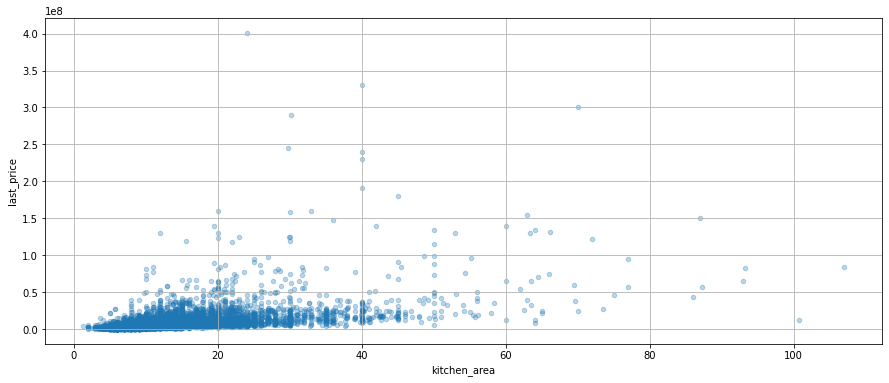

In [155]:
corr1 ('kitchen_area') # зависимость от площади кухни

Зависимость конечной цены от площади кухни так же прослеживается. Вывод касаемо площадей предельно понятен. Напишем об этом в общем выводе.

Корелляция цены от rooms 0.38799929998760846


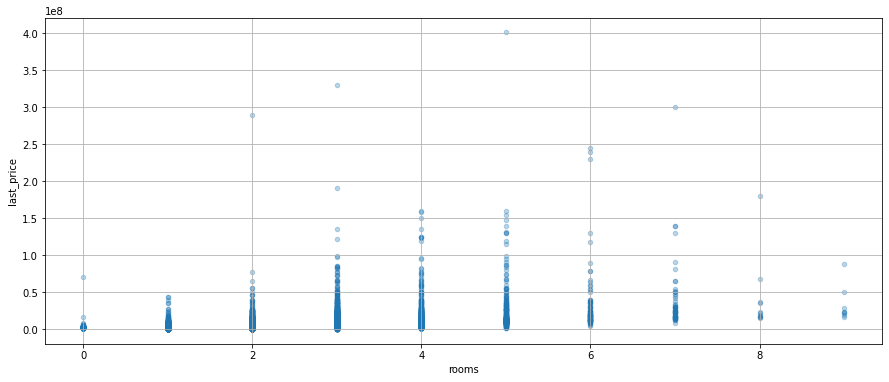

In [156]:
corr1 ('rooms') # зависимость от количества комнат

Зависимость цены от количества комнат слабая. Логично, что комната, которая больше по кв.м. двух других комнат вместе взятых, можеть стоить дороже. Но зависимость небольшая есть безусловно, но точно не определяющая конечную цену. Беря стандартные 1-комнатные, 2-комнатные, 3-комнатные квартиры, цена чаще будет расти по мере возрастания, нежели оставаться на одном уровне.

Корелляция цены от weekday -0.002515547390715122
Корелляция цены от month -0.0031184652744626895
Корелляция цены от year -0.048026015596771277


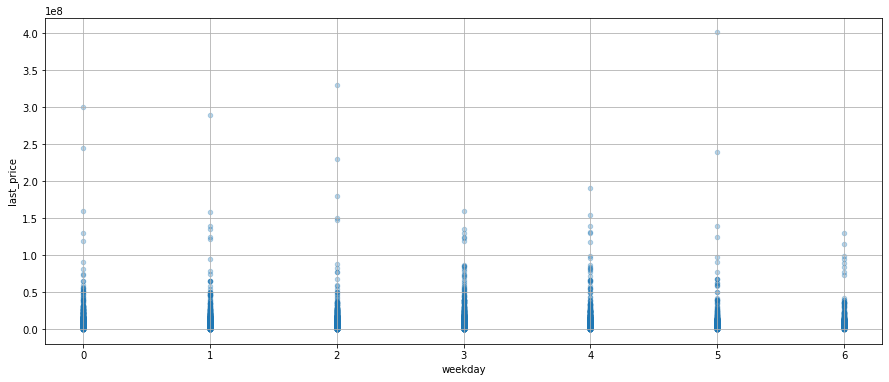

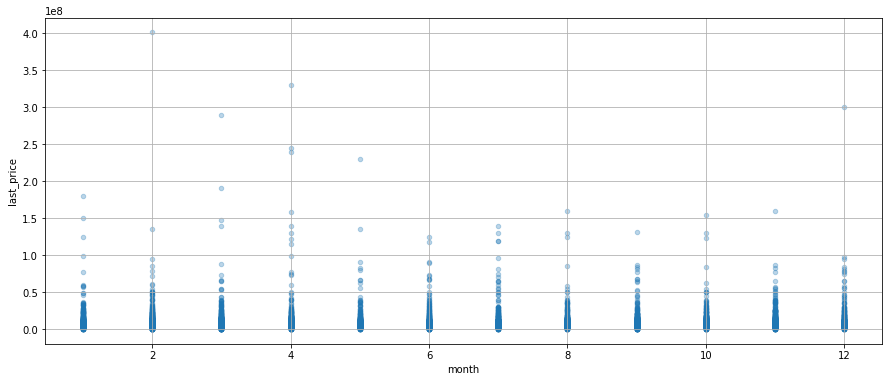

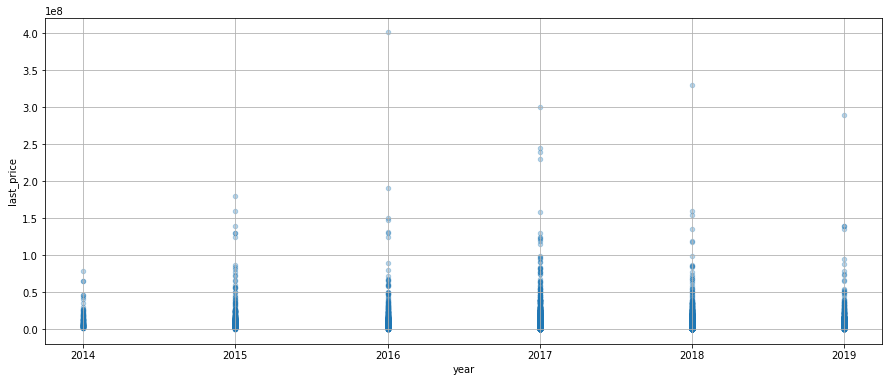

In [157]:
corr1('weekday')
corr1('month')
corr1('year')

На коэффициент корреляции смотреть смысла нет по дням, месяцам и годам, так как он, в данном случае, нам ничего не скажет. Но никакой видимой связи по цене мы не увидим. Единственное, что мы смотрели выше, пик публикаций приходится на весну и осень. На основании чего можно предположить, что спрос в это время выше, чем в остальное, соответственно и цена может быть выше.

Далее построим график, с помощью сводной таблицы, чтобы увидеть есть ли зависимость цены от этажа, на котором находится квартира:

<AxesSubplot:title={'center':'Зависимость цены от этажа'}, xlabel='floor_category'>

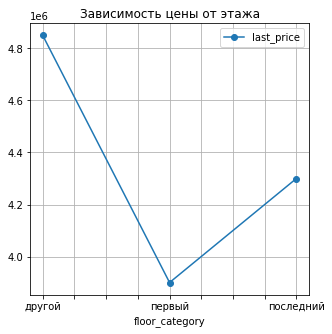

In [158]:
df.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от этажа')
# построения графика, используя сводную таблицу

Что и следовало ожидать, как и принято на рынке, по крайней мере, жилой недвижимости. Цена меньше всего у квартир на 1 этаже, подороже на последнем этаже. Все остальные квартиры между первым и последним этажом, как правило, стоят дороже.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [159]:
local_name10 = df.pivot_table(index = 'locality_name', values = 'sq_metr_pr', aggfunc=['count', 'mean'])
local_name10.columns = ['counts', 'sq_metr_pr']
local_name10 = local_name10.sort_values(by='counts', ascending=False).head(10)
# создали сводную таблицу, изменили названия колонок и отсортировали по убыванию количества публикаций

In [160]:
local_name10 # вызов таблицы

,counts,sq_metr_pr
locality_name,,
Санкт-Петербург,15353,"114,416.06"
Мурино,486,"85,800.48"
Кудрово,463,"95,247.90"
Шушары,432,"78,718.09"
Всеволожск,390,"68,582.68"
Пушкин,367,"103,178.34"
Колпино,337,"75,480.12"
Гатчина,303,"68,624.69"
Выборг,233,"58,256.40"


<AxesSubplot:ylabel='Название населенного пункта'>

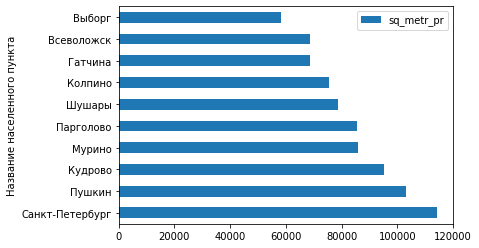

In [161]:
local_name10['sq_metr_pr'].sort_values(ascending=False).to_frame().plot.barh(xlabel= 'Название населенного пункта', ylabel = 'Цена за квадратный метр')
# сортировка по убыванию цены за квадратный метр

Исходя из полученных данных, можем сделать очевидные выводы, что самое большое количество публикаций связано с объектами недвижимости в Санкт-Петербурге. И отсортировав данные из списка по цене за квадратный метр, видим, что самая высокая стоимость квадратного метра в Санкт-Петербурге, а самая низкая (фактически в 2 раза) - в Выборге. 
<br>
Из близлежащих населенных пунктов от Санкт-Петербурга, так же достаточно ощутимая сумма за кв.м. в Пушкине.

In [162]:
price_km_spb = df.pivot_table(index='city_centers_km', values='last_price', aggfunc='mean')
# создаем сводную таблицу, генерируемую по конечной цене и удалению от центра

<AxesSubplot:xlabel='Расстояние до центра в км', ylabel='Цена'>

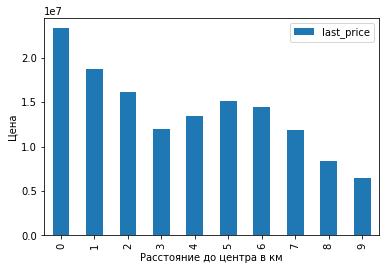

In [163]:
price_km_spb.drop([-999]).head(10).plot.bar(xlabel = 'Расстояние до центра в км', ylabel = 'Цена') # удаляем строку с "заглушками" и выводим график

По данной таблице можем сделать вывод, что чем ближе к самому сердцу Санкт-Петербурга, тем дороже стоит жильё. По мере убывания километража и ценам, можно прийти к тому, что центром можно считать всё в пределах 7-8 км. Дальше цены значительно падают.

### Общий вывод

Проведя большое исследование и анализ можем сделать следующие выводы, касаемо особенностей и зависимостей по продаже недвижимости в Санкт-Петербурге и соседних населённых пунктов за несколько лет:

- Большая часть жилья продается в диапазоне от 2,5 до 6 млн. Как правило, это квартиры-студии и однокомнатные квартиры. В связи с большим количеством переездов, молодым людям проще заработать и купить, что-то более дешевое и практичное, поэтому застройщики активно продвигают такой тип жилья.
<br>

- Так же большая часть жилья продается за пределами центра города, что неудивительно, учитывая ценовую политику центра, который мы определили в диапазоне 7-8 км. Дешевле 12-13 млн в центре мало что можно найти, поэтому одни из самых публикуемых объявлений по недвижимости, находящейся в диапазоне 13-17 км от центра. 
<br>

- Мы обнаружили прямопропорциональную зависимость конечной стоимости недвижимости от её площади (любого типа). Пожалуй, это самая очевидная зависимость. 
<br>

- Классически, более дешевое жилье находится на первом и последнем этажах. Всё жилье между ними продается на порядок дороже.
<br>

- По количеству комнат, самые ходовые так же классически идут 1-комнатные (студии в том числе), 2-комнатные и 3-комнатные квартиры. С большим количеством комнат уже можно отнести к более элитному жилью. Цены некоторых объектов могут действительно доходить до больших сумм, вплоть до 400-500 млн. Например, для недвижимости на Крестовском острове.
<br>

- В среднем, чаще всего, по времени продажа жилья занимает 90-95 дней (в течении 3-х месяцев). 
<br>